In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline


In [2]:
df =pd.read_csv('infy.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5296 entries, 0 to 5295
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       5296 non-null   object 
 1   Open Price                 5296 non-null   float64
 2   High Price                 5296 non-null   float64
 3   Low Price                  5296 non-null   float64
 4   Close Price                5296 non-null   float64
 5   WAP                        5296 non-null   float64
 6   No.of Shares               5296 non-null   int64  
 7   No. of Trades              5296 non-null   int64  
 8   Total Turnover (Rs.)       5296 non-null   float64
 9   Deliverable Quantity       4792 non-null   float64
 10  % Deli. Qty to Traded Qty  4792 non-null   float64
 11  Spread High-Low            5296 non-null   float64
 12  Spread Close-Open          5296 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [3]:
df.Date=pd.to_datetime(df.Date)
df.set_index('Date',inplace=True)
df.head()


,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2021-06-04,1392.00,1396.50,1377.9,1385.20,1386.142576,108272,4901,1.500804e+08,40390.0,37.30,18.60,-6.80
2021-06-03,1382.00,1398.65,1377.2,1389.50,1386.545266,243404,12798,3.374907e+08,103459.0,42.50,21.45,7.50
2021-06-02,1378.65,1392.00,1362.2,1379.75,1366.888615,1906584,31599,2.606088e+09,1441943.0,75.63,29.80,1.10
2021-06-01,1400.00,1400.80,1378.6,1387.40,1385.129123,184134,7222,2.550494e+08,90643.0,49.23,22.20,-12.60
2021-05-31,1405.00,1405.00,1383.1,1393.65,1391.983909,1009210,12189,1.404804e+09,813022.0,80.56,21.90,-11.35


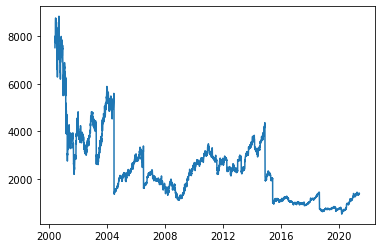

In [4]:
df=df.iloc[::-1]
df['Target']=df['Close Price'].shift(periods=-1)
df.tail()
plt.plot(df.index,df['Target'])

In [5]:
profile=ProfileReport(df.drop('Target',axis='columns'),title="olhc Report",explorative=True)

In [6]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
print(df.shape)
df_m=df
df_m=df_m.dropna()
df_m.shape

(5296, 13)


(4791, 13)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(df_m.drop(['Target'],axis='columns'),df_m['Target'],test_size=0.1)

In [9]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [10]:
model.score(x_test,y_test)

0.9979206730852195

In [11]:
# To predict 5-6-21
model.predict([[1392.00,1396.50,1377.9,1385.20,1386.142576,108272,4901,1.500804e+08,40390.0,37.30,18.60,-6.80]])

array([1387.49386574])

In [12]:
pred_y=model.predict(x_test)
mean_squared_error(y_test,pred_y,squared=False)

51.37297335612764

In [13]:
mean_squared_error(y_test,pred_y)

2639.1823914494

In [14]:
mean_absolute_error(y_test,pred_y)

29.85199478830445

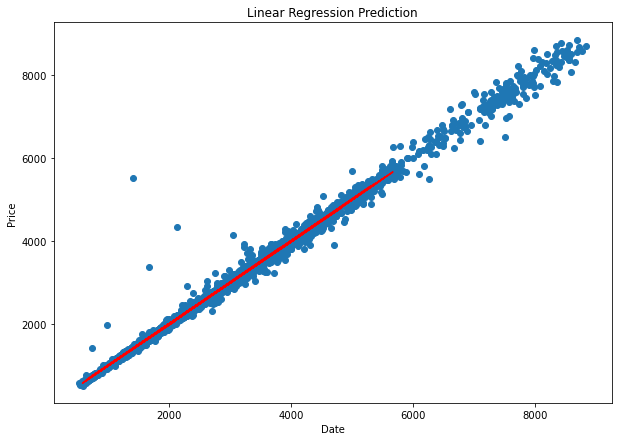

In [15]:
# Plot outputs
plt.figure(figsize=(10,7))
plt.scatter(x=df['Target'], y=df['Close Price'])
plt.plot(x_test['Close Price'], model.predict(x_test), color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Prediction')
plt.show()

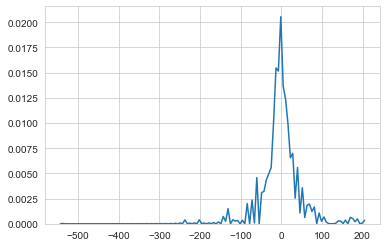

In [16]:

delta_y = y_test-pred_y;


sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

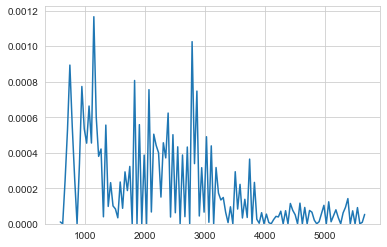

In [17]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(pred_y), bw=0.5)
plt.show()

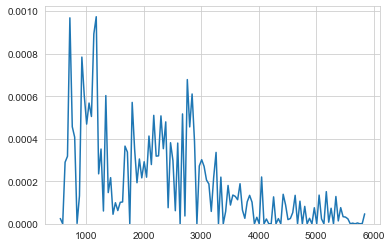

In [18]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_test), bw=0.5)
plt.show()

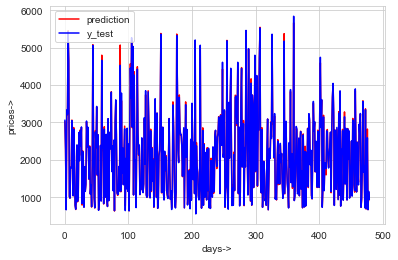

In [19]:
plt.plot(pred_y,color='red', label='prediction')
plt.plot(list(y_test),color='blue', label='y_test')
plt.xlabel('days->')
plt.ylabel('prices->')
plt.legend(loc='upper left')
plt.show()